## Importimg libraries

In [1157]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [1158]:
import json, requests
import cufflinks as cf

## Reading the data from the repository
## As the source data is in jason format, usig pandas function to read it and put it into the dataframe

In [1164]:
time_data = requests.get('https://api.rootnet.in/covid19-in/stats/history').json()

In [1165]:
time_india = pd.io.json.json_normalize(time_data['data'])

In [1166]:
time_india.drop(['regional','summary.confirmedButLocationUnidentified','summary.confirmedCasesForeign','summary.confirmedCasesIndian'],axis=1,inplace=True)

In [1167]:
time_india.rename(inplace=True,columns={"summary.discharged": "discharged", "summary.total": "total", "summary.deaths":"deaths"})

In [1168]:
time_india.head()

,day,deaths,discharged,total
0,2020-03-10,0,0,47
1,2020-03-11,0,0,60
2,2020-03-12,0,0,73
3,2020-03-13,2,10,82
4,2020-03-14,2,10,84


In [1169]:
time_india.index

RangeIndex(start=0, stop=88, step=1)

## Making sure date feature is of object type
## Coverting the date column to the date time object

In [1170]:
time_india['day'] = pd.to_datetime(time_india['day'])

In [1171]:
#time_india['month'] = time_india['day'].apply(lambda date : date.month)
#time_india['dayn'] = time_india['day'].apply(lambda date : date.day)
#time_india.drop('day',axis=1,inplace=True)

In [1180]:
time_india.rename(columns=({'discharged':'recovered'}),inplace=True)

In [1181]:
time_india.tail()

,day,deaths,recovered,total
83,2020-06-01,5394,91819,190535
84,2020-06-02,5598,95527,198706
85,2020-06-03,5815,100303,207615
86,2020-06-04,6075,104107,216919
87,2020-06-05,6348,109462,226770


## Visualization of the data

Finding the relation between the features

In [1182]:
time_india.corr()['total']

deaths       0.997918
recovered    0.990723
total        1.000000
Name: total, dtype: float64

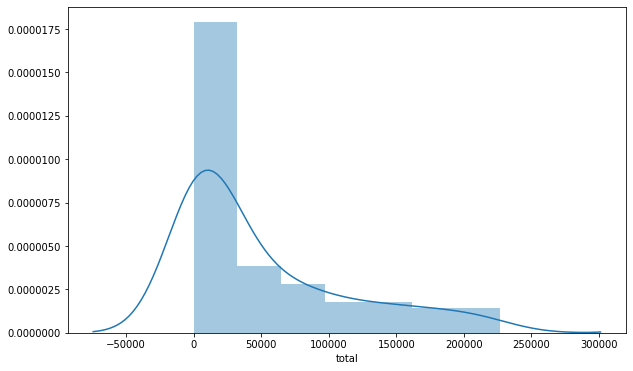

In [1183]:
plt.figure(figsize=(10,6))
sns.distplot(time_india['total'])

Plotting a pairplot for all features, we can see the features deaths and recovered are related

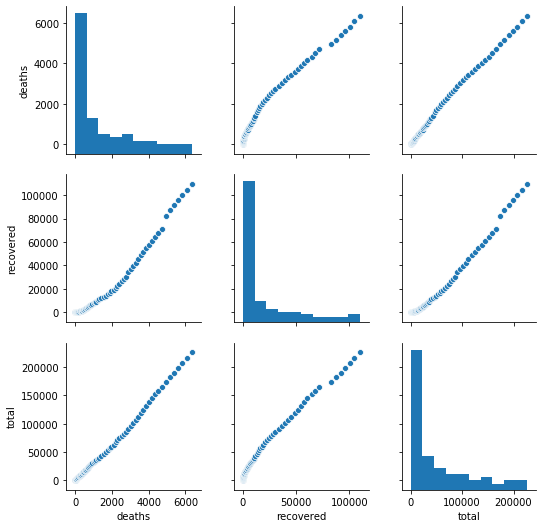

In [1184]:
sns.pairplot(time_india)

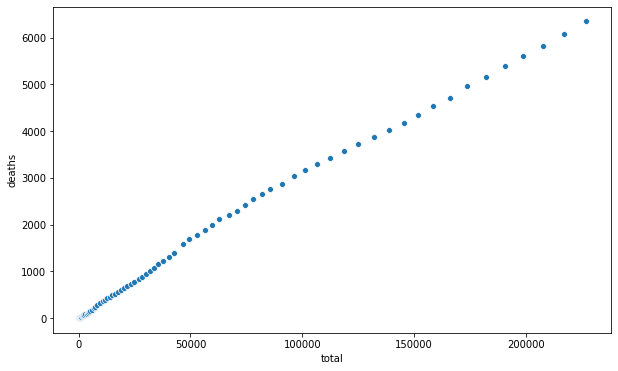

In [1185]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=time_india['total'],y=time_india['deaths'],data=time_india)

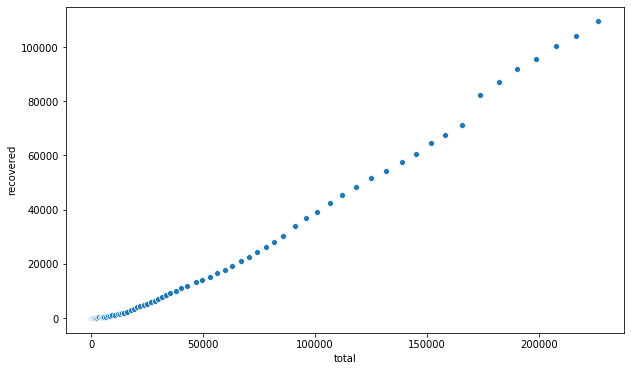

In [1186]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=time_india['total'],y=time_india['recovered'],data=time_india)

In [1187]:
#plt.figure(figsize=(10,6))
#sns.scatterplot(x=time_india['total'],y=time_india['day'],data=time_india)

In [1188]:
#time_india.drop('day',axis=1,inplace=True)

In [1189]:
time_india.head()

,day,deaths,recovered,total
0,2020-03-10,0,0,47
1,2020-03-11,0,0,60
2,2020-03-12,0,0,73
3,2020-03-13,2,10,82
4,2020-03-14,2,10,84


In [1190]:
time_india.tail()

,day,deaths,recovered,total
83,2020-06-01,5394,91819,190535
84,2020-06-02,5598,95527,198706
85,2020-06-03,5815,100303,207615
86,2020-06-04,6075,104107,216919
87,2020-06-05,6348,109462,226770


## Building a ML model to predict a number of cases for next 10 days

**We will be predicting total number of cases for next 10 days and number deaths for next 10 days**

**Building a model for predicting the number of cases for next 10 days**

In [1191]:
total_df = time_india.drop(['deaths','recovered','day'],axis=1)

In [1192]:
total_df.reset_index(inplace=True)

In [1193]:
total_df.head()

,index,total
0,0,47
1,1,60
2,2,73
3,3,82
4,4,84


## Importing libraries to for ML 

In [1247]:
#import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
#from tensorflow.keras.constraints import max_norm

In [1508]:
model = Sequential()

model.add(Dense(19,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [1509]:
#model.summary()

**Setting up a test data**

In [1510]:
X = total_df.drop('total',axis=1).values
#X = total_df.index
#total_df.drop('total',axis=1).values

**Total features has a data which is very high in qauntity wise so need to normalise that. Using the log function to normalise the values to fit for mnodel**

In [1511]:
y = np.log10(total_df['total'].values)
y

array([1.67209786, 1.77815125, 1.86332286, 1.91381385, 1.92427929,
       2.04139269, 2.05690485, 2.13672057, 2.17897695, 2.2380461 ,
       2.34830486, 2.45178644, 2.5563025 , 2.66931688, 2.71516736,
       2.78247262, 2.84135947, 2.85973857, 2.95856388, 3.01029996,
       3.09725731, 3.14519641, 3.26339933, 3.31576049, 3.40602894,
       3.48742121, 3.55351894, 3.63154523, 3.68024484, 3.72214013,
       3.76826802, 3.83001094, 3.8767373 , 3.92670249, 3.9709045 ,
       4.03402652, 4.07674964, 4.10581664, 4.14097916, 4.1700269 ,
       4.20725726, 4.24689232, 4.2784106 , 4.31113906, 4.33645973,
       4.37017989, 4.39693127, 4.43002665, 4.45301239, 4.4767447 ,
       4.50118255, 4.52646851, 4.54857366, 4.57721597, 4.60490613,
       4.63180891, 4.66941916, 4.69364782, 4.72388237, 4.75083226,
       4.77569781, 4.79891984, 4.82705895, 4.84976327, 4.87087774,
       4.89211131, 4.91365494, 4.9330315 , 4.95869286, 4.9830351 ,
       5.00491866, 5.02836788, 5.05060787, 5.07352407, 5.09726

**Fiting the model to the data**

In [1512]:
model.fit(X,y.reshape([y.shape[0],1]),
          epochs=1000,
          batch_size=32)

Epoch 1/1000
3/3 [==============================] - 0s 3ms/step - loss: 2.7137 - accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.3967 - accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 3ms/step - loss: 1.4974 - accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 5ms/step - loss: 1.4428 - accuracy: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 3ms/step - loss: 1.3183 - accuracy: 0.0000e+00
Epoch 6/1000
3/3 [==============================] - 0s 4ms/step - loss: 1.3112 - accuracy: 0.0000e+00
Epoch 7/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.3179 - accuracy: 0.0000e+00
Epoch 8/1000
3/3 [==============================] - 0s 3ms/step - loss: 1.2862 - accuracy: 0.0000e+00
Epoch 9/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.2403 - accuracy: 0.0000e+00
Epoch 10/1000
3/3 [==============================] - 0s 2ms/step - loss: 1.2587 - 

3/3 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.0000e+00
Epoch 80/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.0000e+00
Epoch 81/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0326 - accuracy: 0.0000e+00
Epoch 82/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.0000e+00
Epoch 83/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.0000e+00
Epoch 84/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.0000e+00
Epoch 85/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0332 - accuracy: 0.0000e+00
Epoch 86/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.0000e+00
Epoch 87/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.0000e+00
Epoch 88/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0365 - accur

Epoch 158/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 159/1000
3/3 [==============================] - 0s 2ms/step - loss: 8.1086e-04 - accuracy: 0.0000e+00
Epoch 160/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 161/1000
3/3 [==============================] - 0s 3ms/step - loss: 8.3235e-04 - accuracy: 0.0000e+00
Epoch 162/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 163/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 164/1000
3/3 [==============================] - 0s 2ms/step - loss: 6.5555e-04 - accuracy: 0.0000e+00
Epoch 165/1000
3/3 [==============================] - 0s 3ms/step - loss: 5.9108e-04 - accuracy: 0.0000e+00
Epoch 166/1000
3/3 [==============================] - 0s 4ms/step - loss: 5.7998e-04 - accuracy: 0.0000e+00
Epoch 167/1000
3/3 [========================

3/3 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 236/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 237/1000
3/3 [==============================] - 0s 2ms/step - loss: 6.2581e-04 - accuracy: 0.0000e+00
Epoch 238/1000
3/3 [==============================] - 0s 3ms/step - loss: 7.8713e-04 - accuracy: 0.0000e+00
Epoch 239/1000
3/3 [==============================] - 0s 3ms/step - loss: 7.4728e-04 - accuracy: 0.0000e+00
Epoch 240/1000
3/3 [==============================] - 0s 3ms/step - loss: 6.7185e-04 - accuracy: 0.0000e+00
Epoch 241/1000
3/3 [==============================] - 0s 2ms/step - loss: 9.0990e-04 - accuracy: 0.0000e+00
Epoch 242/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 243/1000
3/3 [==============================] - 0s 2ms/step - loss: 8.1045e-04 - accuracy: 0.0000e+00
Epoch 244/1000
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 313/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 314/1000
3/3 [==============================] - 0s 2ms/step - loss: 5.9318e-04 - accuracy: 0.0000e+00
Epoch 315/1000
3/3 [==============================] - 0s 2ms/step - loss: 8.0962e-04 - accuracy: 0.0000e+00
Epoch 316/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 317/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 318/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 319/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.0000e+00
Epoch 320/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 321/1000
3/3 [==============================] - 0s 2ms/step - los

Epoch 390/1000
3/3 [==============================] - 0s 3ms/step - loss: 4.9658e-04 - accuracy: 0.0000e+00
Epoch 391/1000
3/3 [==============================] - 0s 3ms/step - loss: 4.5120e-04 - accuracy: 0.0000e+00
Epoch 392/1000
3/3 [==============================] - 0s 4ms/step - loss: 4.3367e-04 - accuracy: 0.0000e+00
Epoch 393/1000
3/3 [==============================] - 0s 4ms/step - loss: 4.2488e-04 - accuracy: 0.0000e+00
Epoch 394/1000
3/3 [==============================] - 0s 3ms/step - loss: 9.4665e-04 - accuracy: 0.0000e+00
Epoch 395/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 0.0000e+00
Epoch 396/1000
3/3 [==============================] - 0s 4ms/step - loss: 5.2783e-04 - accuracy: 0.0000e+00
Epoch 397/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 398/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 399/1000
3/3 [====================

3/3 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.0000e+00
Epoch 467/1000
3/3 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.0000e+ - 0s 2ms/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 468/1000
3/3 [==============================] - 0s 4ms/step - loss: 5.7348e-04 - accuracy: 0.0000e+00
Epoch 469/1000
3/3 [==============================] - 0s 3ms/step - loss: 6.9585e-04 - accuracy: 0.0000e+00
Epoch 470/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 471/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 472/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 473/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.0000e+00
Epoch 474/1000
3/3 [==============================] - 0s 3ms/step - loss: 7.2514e-04 - accuracy: 0.0000e+00
Epoch 475/1000
3/3 [=

3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 544/1000
3/3 [==============================] - 0s 2ms/step - loss: 7.1199e-04 - accuracy: 0.0000e+00
Epoch 545/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 546/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 547/1000
3/3 [==============================] - ETA: 0s - loss: 0.0091 - accuracy: 0.0000e+ - 0s 2ms/step - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 548/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.0000e+00
Epoch 549/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 550/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 551/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 552/1000
3/3 [=========

3/3 [==============================] - 0s 2ms/step - loss: 6.8486e-04 - accuracy: 0.0000e+00
Epoch 620/1000
3/3 [==============================] - 0s 3ms/step - loss: 6.0295e-04 - accuracy: 0.0000e+00
Epoch 621/1000
3/3 [==============================] - ETA: 0s - loss: 5.0953e-04 - accuracy: 0.0000e+ - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 622/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0000e+00
Epoch 623/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.0000e+00
Epoch 624/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 625/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 626/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.0000e+00
Epoch 627/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 628/1000
3/3 [=

3/3 [==============================] - 0s 2ms/step - loss: 4.3384e-04 - accuracy: 0.0000e+00
Epoch 696/1000
3/3 [==============================] - 0s 3ms/step - loss: 3.6308e-04 - accuracy: 0.0000e+00
Epoch 697/1000
3/3 [==============================] - 0s 2ms/step - loss: 4.8583e-04 - accuracy: 0.0000e+00
Epoch 698/1000
3/3 [==============================] - 0s 2ms/step - loss: 4.0068e-04 - accuracy: 0.0000e+00
Epoch 699/1000
3/3 [==============================] - 0s 2ms/step - loss: 3.8492e-04 - accuracy: 0.0000e+00
Epoch 700/1000
3/3 [==============================] - 0s 2ms/step - loss: 4.3630e-04 - accuracy: 0.0000e+00
Epoch 701/1000
3/3 [==============================] - 0s 2ms/step - loss: 5.9465e-04 - accuracy: 0.0000e+00
Epoch 702/1000
3/3 [==============================] - 0s 2ms/step - loss: 3.5718e-04 - accuracy: 0.0000e+00
Epoch 703/1000
3/3 [==============================] - 0s 2ms/step - loss: 3.5089e-04 - accuracy: 0.0000e+00
Epoch 704/1000
3/3 [=======================

3/3 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.0000e+00
Epoch 772/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 773/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 774/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.0000e+00
Epoch 775/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.0000e+00
Epoch 776/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 777/1000
3/3 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 0.0000e+00
Epoch 778/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 779/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0000e+00
Epoch 780/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.001

3/3 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.0000e+00
Epoch 847/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 848/1000
3/3 [==============================] - 0s 2ms/step - loss: 9.9798e-04 - accuracy: 0.0000e+00
Epoch 849/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.0000e+00
Epoch 850/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 851/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 852/1000
3/3 [==============================] - 0s 2ms/step - loss: 7.5000e-04 - accuracy: 0.0000e+00
Epoch 853/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0000e+00
Epoch 854/1000
3/3 [==============================] - 0s 2ms/step - loss: 9.3991e-04 - accuracy: 0.0000e+00
Epoch 855/1000
3/3 [==============================] - 0s 2ms/step -

3/3 [==============================] - 0s 3ms/step - loss: 3.8070e-04 - accuracy: 0.0000e+00
Epoch 922/1000
3/3 [==============================] - 0s 2ms/step - loss: 6.9497e-04 - accuracy: 0.0000e+00
Epoch 923/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.0000e+00
Epoch 924/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 925/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 926/1000
3/3 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.0000e+00
Epoch 927/1000
3/3 [==============================] - 0s 2ms/step - loss: 9.8614e-04 - accuracy: 0.0000e+00
Epoch 928/1000
3/3 [==============================] - 0s 2ms/step - loss: 9.9096e-04 - accuracy: 0.0000e+00
Epoch 929/1000
3/3 [==============================] - 0s 2ms/step - loss: 9.5298e-04 - accuracy: 0.0000e+00
Epoch 930/1000
3/3 [==============================] - 0s 2m

3/3 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.0000e+00
Epoch 999/1000
3/3 [==============================] - 0s 3ms/step - loss: 6.0158e-04 - accuracy: 0.0000e+00
Epoch 1000/1000
3/3 [==============================] - 0s 2ms/step - loss: 8.0655e-04 - accuracy: 0.0000e+00


In [1513]:
losses = pd.DataFrame(model.history.history)

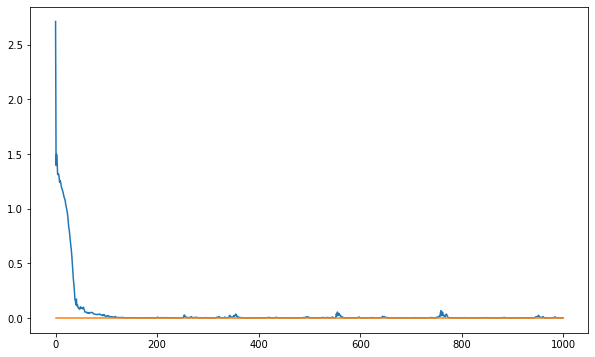

In [1514]:
plt.figure(figsize=(10,6))
plt.plot(losses)

In [1515]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            multiple                  38        
_________________________________________________________________
dense_213 (Dense)            multiple                  380       
_________________________________________________________________
dense_214 (Dense)            multiple                  380       
_________________________________________________________________
dense_215 (Dense)            multiple                  380       
_________________________________________________________________
dense_216 (Dense)            multiple                  380       
_________________________________________________________________
dense_217 (Dense)            multiple                  20        
Total params: 1,578
Trainable params: 1,578
Non-trainable params: 0
___________________________________________________

**From the above graph losses for this model are pretty low and are constant and steady at the end**

**Now lets do the prediction for the next 10 days**

In [1542]:
next_10 = np.arange(0,len(X)+10).reshape(len(X)+10,1)

In [1544]:
#next_10

**Below code will predict the total cases for next 10 days along with the prediction for earlier days**

In [1545]:
total_cases_pred = np.power(10,model.predict(next_10))

In [1546]:
total_cases_pred = pd.DataFrame(total_cases_pred,columns=['total_pred'])
next_10_days     = pd.DataFrame(next_10,columns=['days'])

**Verifying the predicted data against the actual data**

In [1547]:
total_cases_pred['total_pred'][40],time_india['total'].iloc[40]

(14867.481, 16116)

In [1521]:
total_pred = pd.concat([next_10_days,total_cases_pred],axis=1)

In [1522]:
total_pred.tail(10).style.background_gradient(cmap='Blues')

,days,total_pred
88,88,244174
89,89,264201
90,90,285871
91,91,309320
92,92,334691
93,93,362140
94,94,391844
95,95,423987
96,96,458763
97,97,496388


In [1523]:
#total_pred['total_pred']

In [1524]:
time_india['total_pred'] = np.round(total_pred['total_pred'])

In [1525]:
time_india.tail(20)

,day,deaths,recovered,total,total_pred,deaths_pred
68,2020-05-17,2872,34109,90927,81315.0,2446.0
69,2020-05-18,3029,36824,96169,85664.0,2568.0
70,2020-05-19,3163,39174,101139,90244.0,2697.0
71,2020-05-20,3303,42298,106750,95071.0,2833.0
72,2020-05-21,3435,45300,112359,100155.0,2975.0
73,2020-05-22,3583,48534,118447,105511.0,3124.0
74,2020-05-23,3720,51784,125101,111154.0,3281.0
75,2020-05-24,3867,54441,131868,117100.0,3446.0
76,2020-05-25,4021,57721,138845,123361.0,3619.0
77,2020-05-26,4167,60491,145380,129958.0,3801.0


In [1526]:
time_india['total'].iloc[5]

110

In [1527]:
time_india['day'].iloc[0:len(X)].tail(1)

87   2020-06-05
Name: day, dtype: datetime64[ns]

**Plotting a curve for actual prediction against the predictions through the model.**
**From the graph below we can say that this model is doing a pretty decent job**

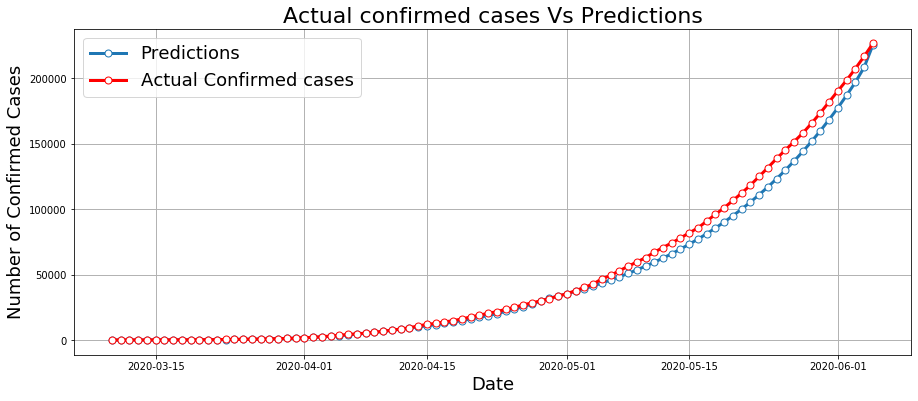

In [1528]:
plt.figure(figsize=(15,6))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')

# Our predictions
plt.plot(time_india['day'].iloc[0:len(X)],total_cases_pred['total_pred'].iloc[0:len(X)],
         label="Predictions",**marker_style)

# Actual confirmed cases
plt.plot(time_india['day'].iloc[0:len(X)],time_india['total'].iloc[0:len(X)],'r',
        label="Actual Confirmed cases",**marker_style)


plt.title("Actual confirmed cases Vs Predictions",{'fontsize':22})


plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Confirmed Cases",fontsize =18)


plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')



plt.legend(fontsize =18)

In [1529]:
from datetime import datetime, timedelta,date
import calendar

**Defining a fucntion to get the date value for the next 10 days**

In [1530]:
first_day = '2020-03-10'

def nextdate(nday):
    total_days = date.today() - date.fromisoformat(first_day) + timedelta(days=nday)
    str_day = np.zeros((total_days.days,1))
    d1 = date.fromisoformat(first_day)
    date_list = []        
    date_list.append(d1)
    for i in range(0,total_days.days):        
        d1 = d1 + timedelta(days=1)        
        date_list.append(d1)
    date_df = pd.DataFrame(date_list)
    date_df.rename(columns={0:'days'},inplace=True)
    return date_df
    

In [1531]:
date_df = nextdate(10)

In [1532]:
date_df.tail()

,days
93,2020-06-11
94,2020-06-12
95,2020-06-13
96,2020-06-14
97,2020-06-15


In [1533]:
total_cases_pred.tail()

,total_pred
93,362140.00000
94,391844.18750
95,423986.71875
96,458762.81250
97,496388.00000


In [1534]:
final_pred = pd.concat([date_df,time_india['total'],np.round(total_cases_pred['total_pred'])],axis=1)

In [1535]:
final_pred.rename(columns=({'days':'Date','total':'Actual Confirmed Cases','total_pred':'Predictions'}),inplace=True)

In [1536]:
final_pred.set_index('Date',inplace=True)

In [1537]:
final_pred.head()

,Actual Confirmed Cases,Predictions
Date,,
2020-03-10,47.0,47.0
2020-03-11,60.0,60.0
2020-03-12,73.0,72.0
2020-03-13,82.0,79.0
2020-03-14,84.0,87.0


**Below are the predictoins for the next 10 days**

In [1538]:
final_pred.tail(15).style.background_gradient(cmap='Blues') 

,Actual Confirmed Cases,Predictions
Date,,
2020-06-01,190535,177648
2020-06-02,198706,187147
2020-06-03,207615,197155
2020-06-04,216919,208559
2020-06-05,226770,225664
2020-06-06,nan,244174
2020-06-07,nan,264201
2020-06-08,nan,285871
2020-06-09,nan,309320


**Building a model to predict the number fo detahs for next 10 days**

In [1294]:
deaths_df = time_india.drop(['total','recovered','day','total_pred'],axis=1)

In [1295]:
deaths_df.head()

,deaths
0,0
1,0
2,0
3,2
4,2


In [1300]:
deaths_df.reset_index(inplace=True)

In [1302]:
deaths_df.tail()

,index,deaths
83,83,5394
84,84,5598
85,85,5815
86,86,6075
87,87,6348


In [1470]:
model1 = Sequential()    

model1.add(Dense(34,activation='relu'))
#model.add(Dropout(0.2))

model1.add(Dense(34,activation='relu'))
#model.add(Dropout(0.2))

model1.add(Dense(34,activation='relu'))
#model.add(Dropout(0.2))

model1.add(Dense(34,activation='relu'))
#model.add(Dropout(0.2))

model1.add(Dense(34,activation='relu'))
#model.add(Dropout(0.2))

model1.add(Dense(1))

model1.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [1471]:
X1 = deaths_df.drop('deaths',axis=1).iloc[4:].values

In [1473]:
y1 = np.log10(deaths_df['deaths'].iloc[4:].values)
#y1 = deaths_df['deaths'].values
#y1

In [1474]:
model1.fit(X1,y1.reshape([y1.shape[0],1]),
          epochs=700,
          batch_size=32)

Epoch 1/700
3/3 [==============================] - 0s 2ms/step - loss: 39.8540 - accuracy: 0.0000e+00
Epoch 2/700
3/3 [==============================] - 0s 3ms/step - loss: 9.5038 - accuracy: 0.0000e+00
Epoch 3/700
3/3 [==============================] - 0s 3ms/step - loss: 1.3811 - accuracy: 0.0119
Epoch 4/700
3/3 [==============================] - 0s 3ms/step - loss: 0.2247 - accuracy: 0.0238
Epoch 5/700
3/3 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.0238
Epoch 6/700
3/3 [==============================] - 0s 3ms/step - loss: 0.4003 - accuracy: 0.0238
Epoch 7/700
3/3 [==============================] - 0s 4ms/step - loss: 0.2358 - accuracy: 0.0238
Epoch 8/700
3/3 [==============================] - 0s 3ms/step - loss: 0.2484 - accuracy: 0.0238
Epoch 9/700
3/3 [==============================] - 0s 3ms/step - loss: 0.2630 - accuracy: 0.0238
Epoch 10/700
3/3 [==============================] - 0s 4ms/step - loss: 0.1884 - accuracy: 0.0238
Epoch 11/700
3/3 [==

3/3 [==============================] - 0s 3ms/step - loss: 0.1151 - accuracy: 0.0238
Epoch 85/700
3/3 [==============================] - 0s 4ms/step - loss: 0.1185 - accuracy: 0.0238
Epoch 86/700
3/3 [==============================] - 0s 2ms/step - loss: 0.1164 - accuracy: 0.0238
Epoch 87/700
3/3 [==============================] - 0s 4ms/step - loss: 0.1129 - accuracy: 0.0238
Epoch 88/700
3/3 [==============================] - ETA: 0s - loss: 0.1263 - accuracy: 0.03 - 0s 3ms/step - loss: 0.1136 - accuracy: 0.0238
Epoch 89/700
3/3 [==============================] - 0s 2ms/step - loss: 0.1119 - accuracy: 0.0238
Epoch 90/700
3/3 [==============================] - 0s 3ms/step - loss: 0.1146 - accuracy: 0.0238
Epoch 91/700
3/3 [==============================] - 0s 3ms/step - loss: 0.1095 - accuracy: 0.0238
Epoch 92/700
3/3 [==============================] - 0s 4ms/step - loss: 0.1139 - accuracy: 0.0238
Epoch 93/700
3/3 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy

3/3 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.0238
Epoch 166/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.0238
Epoch 167/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0947 - accuracy: 0.0238
Epoch 168/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 0.0238
Epoch 169/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.0238
Epoch 170/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.0238
Epoch 171/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.0238
Epoch 172/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.0238
Epoch 173/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.0238
Epoch 174/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.0238
Epoch 175/700
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.0238
Epoch 248/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.0238
Epoch 249/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.0238
Epoch 250/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0738 - accuracy: 0.0238
Epoch 251/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0740 - accuracy: 0.0238
Epoch 252/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.0238
Epoch 253/700
3/3 [==============================] - 0s 4ms/step - loss: 0.0721 - accuracy: 0.0238
Epoch 254/700
3/3 [==============================] - 0s 4ms/step - loss: 0.0724 - accuracy: 0.0238
Epoch 255/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0761 - accuracy: 0.0238
Epoch 256/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.0238
Epoch 257/700
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.0230 - accuracy: 0.0238
Epoch 330/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.0238
Epoch 331/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0228 - accuracy: 0.0238
Epoch 332/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.0238
Epoch 333/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.0238
Epoch 334/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.0238
Epoch 335/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.0238
Epoch 336/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0194 - accuracy: 0.0238
Epoch 337/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.0238
Epoch 338/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0183 - accuracy: 0.0238
Epoch 339/700
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.0238
Epoch 412/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.0238
Epoch 413/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0053 - accuracy: 0.0238
Epoch 414/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0040 - accuracy: 0.0238
Epoch 415/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.0238
Epoch 416/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.0238
Epoch 417/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0238
Epoch 418/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.0238
Epoch 419/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.0238
Epoch 420/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0029 - accuracy: 0.0238
Epoch 421/700
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.0238
Epoch 494/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.0238
Epoch 495/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.0238
Epoch 496/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.0238
Epoch 497/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0238
Epoch 498/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.0238
Epoch 499/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0238
Epoch 500/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0238
Epoch 501/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.0238
Epoch 502/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 0.0238
Epoch 503/700
3/3 [=====

3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0238
Epoch 576/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.0238
Epoch 577/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0238
Epoch 578/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0238
Epoch 579/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.0238
Epoch 580/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.0238
Epoch 581/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0238
Epoch 582/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0238
Epoch 583/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0238
Epoch 584/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.0238
Epoch 585/700
3/3 [=====

3/3 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.0238
Epoch 658/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0238
Epoch 659/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0013 - accuracy: 0.0238
Epoch 660/700
3/3 [==============================] - 0s 2ms/step - loss: 9.4394e-04 - accuracy: 0.0238
Epoch 661/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.0238
Epoch 662/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.0238
Epoch 663/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 0.0238
Epoch 664/700
3/3 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.0238
Epoch 665/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.0238
Epoch 666/700
3/3 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.0238
Epoch 667/700
3/3 [=

In [1475]:
losses1 = model1.history.history
#losses1

In [1476]:
loss1 = pd.DataFrame(losses1)

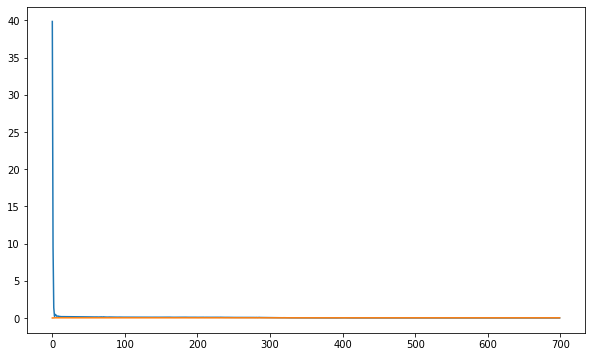

In [1477]:
plt.figure(figsize=(10,6))
plt.plot(loss1)

In [1548]:
deaths_pred = np.power(10,model1.predict(next_10))

In [1552]:
#deaths_pred

In [1554]:
deaths_pred = pd.DataFrame(deaths_pred,columns=['deaths'])
next_10_days = pd.DataFrame(next_10_days,columns=['days'])

In [1558]:
deaths_pred['deaths'][97]

11729.144

In [1555]:
deaths_pred['deaths'][80],time_india['deaths'].iloc[80]

(5099.7607, 4706)

In [1584]:
final_death_pred = pd.concat([next_10_days,deaths_pred],axis=1)

In [1585]:
final_death_pred.tail()

,days,deaths
93,93,9641.803711
94,94,10125.976562
95,95,10634.397461
96,96,11168.445312
97,97,11729.143555


In [1484]:
time_india['deaths'].tail()

83    5394
84    5598
85    5815
86    6075
87    6348
Name: deaths, dtype: int64

In [1485]:
time_india['deaths_pred'][4:].count()

84

In [1486]:
len(np.round(final_death_pred['deaths'])[:84])

84

In [1487]:
time_india['deaths_pred'][3:] = np.round(final_death_pred['deaths'])[:85]

In [1592]:
time_india.head()

,day,deaths,recovered,total,total_pred,deaths_pred
0,2020-03-10,0,0,47,47.0,0.0
1,2020-03-11,0,0,60,60.0,0.0
2,2020-03-12,0,0,73,72.0,0.0
3,2020-03-13,2,10,82,79.0,2.0
4,2020-03-14,2,10,84,87.0,2.0


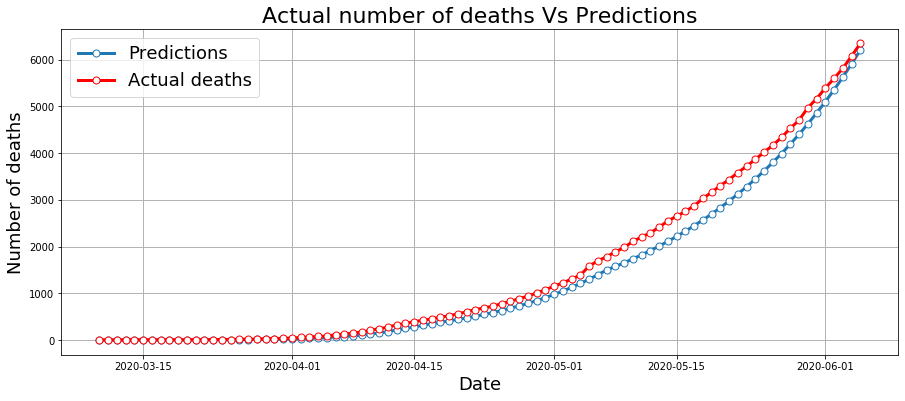

In [1489]:
plt.figure(figsize=(15,6))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')

# Our predictions
plt.plot(time_india['day'].iloc[0:len(X)],time_india['deaths_pred'].iloc[0:len(X)],
         label="Predictions",**marker_style)

# Actual confirmed cases
plt.plot(time_india['day'].iloc[0:len(X)],time_india['deaths'].iloc[0:len(X)],'r',
        label="Actual deaths",**marker_style)


plt.title("Actual number of deaths Vs Predictions",{'fontsize':22})


plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of deaths",fontsize =18)


plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')



plt.legend(fontsize =18)

In [1492]:
model1.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_206 (Dense)            multiple                  68        
_________________________________________________________________
dense_207 (Dense)            multiple                  1190      
_________________________________________________________________
dense_208 (Dense)            multiple                  1190      
_________________________________________________________________
dense_209 (Dense)            multiple                  1190      
_________________________________________________________________
dense_210 (Dense)            multiple                  1190      
_________________________________________________________________
dense_211 (Dense)            multiple                  35        
Total params: 4,863
Trainable params: 4,863
Non-trainable params: 0
___________________________________________________

**Predictions till date**

In [1539]:
time_india.tail(20).style.background_gradient(cmap='Blues') 

,day,deaths,recovered,total,total_pred,deaths_pred
68,2020-05-17 00:00:00,2872,34109,90927,81315,2446
69,2020-05-18 00:00:00,3029,36824,96169,85664,2568
70,2020-05-19 00:00:00,3163,39174,101139,90244,2697
71,2020-05-20 00:00:00,3303,42298,106750,95071,2833
72,2020-05-21 00:00:00,3435,45300,112359,100155,2975
73,2020-05-22 00:00:00,3583,48534,118447,105511,3124
74,2020-05-23 00:00:00,3720,51784,125101,111154,3281
75,2020-05-24 00:00:00,3867,54441,131868,117100,3446
76,2020-05-25 00:00:00,4021,57721,138845,123361,3619
77,2020-05-26 00:00:00,4167,60491,145380,129958,3801


In [1590]:
#date_df

In [1598]:
final_death_pred.head()


,days,deaths
0,0,1.635809
1,1,1.825114
2,2,1.898523
3,3,1.932254
4,4,1.978449


In [1574]:
final_death_pred = pd.concat([date_df,final_death_pred['deaths']],axis=1).set_index('days')

In [1579]:
#final_death_pred.tail()
#final_pred

In [1630]:
#pd.concat([time_india['deaths'],final_death_pred],axis=1)
final_death_pred
ar = np.arange(0,98)
temp = pd.DataFrame(ar,columns=['days'])


In [1636]:
temp['deaths_pred'] = 0
temp.tail()

,days,deaths_pred
93,93,0
94,94,0
95,95,0
96,96,0
97,97,0


In [1639]:
#temp['deaths_pred'] = 0
#temp = []
temp['deaths_pred'][3:] = np.round(final_death_pred['deaths'])[:95]

In [1641]:
temp.tail()

,days,deaths_pred
93,93,8324.0
94,94,8742.0
95,95,9181.0
96,96,9642.0
97,97,10126.0


In [1644]:
d_final = pd.concat([time_india['deaths'],temp],axis=1)

In [1649]:
d_final.drop('days',axis=1,inplace=True)

In [1679]:
date_df['days'].head()

0    2020-03-10
1    2020-03-11
2    2020-03-12
3    2020-03-13
4    2020-03-14
Name: days, dtype: object

In [1676]:
d_final.head()

,deaths,deaths_pred
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,2.0,2.0
4,2.0,2.0


In [1662]:
#d_final[['deaths_pred','deaths']]

In [1695]:
final_death_df = pd.concat([date_df,d_final[['deaths','deaths_pred']]],axis=1)

In [1696]:
final_pred.tail()

,Actual Confirmed Cases,Predictions
Date,,
2020-06-11,NaN,362140.0
2020-06-12,NaN,391844.0
2020-06-13,NaN,423987.0
2020-06-14,NaN,458763.0
2020-06-15,NaN,496388.0


In [1697]:
final_death_df.head()

,days,deaths,deaths_pred
0,2020-03-10,0.0,0.0
1,2020-03-11,0.0,0.0
2,2020-03-12,0.0,0.0
3,2020-03-13,2.0,2.0
4,2020-03-14,2.0,2.0


In [1698]:
final_death_df.set_index('days',inplace=True)

In [1699]:
final_pred.head()

,Actual Confirmed Cases,Predictions
Date,,
2020-03-10,47.0,47.0
2020-03-11,60.0,60.0
2020-03-12,73.0,72.0
2020-03-13,82.0,79.0
2020-03-14,84.0,87.0


In [1727]:
predictions = pd.concat([final_pred,final_death_df],axis=1,ignore_index=False)

In [1736]:
predictions.head()

,Actual Confirmed Cases,Predictions,deaths,deaths_pred
Date,,,,
2020-03-10,47.0,47.0,0.0,0.0
2020-03-11,60.0,60.0,0.0,0.0
2020-03-12,73.0,72.0,0.0,0.0
2020-03-13,82.0,79.0,2.0,2.0
2020-03-14,84.0,87.0,2.0,2.0


In [1773]:
#predictions.reset_index(inplace=True)
predictions.rename(columns=({'deaths':'Actual Deaths','deaths_pred':'Deaths Predictions'}),inplace=True)

In [1735]:
predictions.set_index('Date',inplace=True)

## Predictions for next 10 number cases and deaths in India

In [1774]:
predictions.tail(15).style.background_gradient(cmap='Blues') 

,Actual Confirmed Cases,Predictions,Actual Deaths,Deaths Predictions
Date,,,,
2020-06-01,190535,177648,5394,5100
2020-06-02,198706,187147,5598,5356
2020-06-03,207615,197155,5815,5625
2020-06-04,216919,208559,6075,5907
2020-06-05,226770,225664,6348,6204
2020-06-06,nan,244174,nan,6515
2020-06-07,nan,264201,nan,6843
2020-06-08,nan,285871,nan,7186
2020-06-09,nan,309320,nan,7547


In [1757]:
predictions[-10:-1]['Predictions']

Date
2020-06-06    244174.0
2020-06-07    264201.0
2020-06-08    285871.0
2020-06-09    309320.0
2020-06-10    334691.0
2020-06-11    362140.0
2020-06-12    391844.0
2020-06-13    423987.0
2020-06-14    458763.0
Name: Predictions, dtype: float32

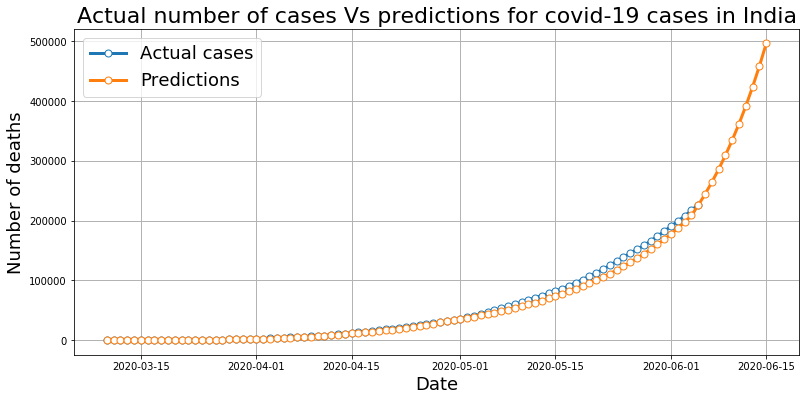

In [1771]:
plt.figure(figsize=(13,6))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')

plt.plot(predictions.index,predictions['Actual Confirmed Cases'],
         label="Actual cases",**marker_style)

plt.plot(predictions.index,predictions['Predictions'],
         label="Predictions",**marker_style)

plt.title("Actual number of cases Vs predictions for covid-19 cases in India",{'fontsize':22})


plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of deaths",fontsize =18)


plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')



plt.legend(fontsize =18)

plt.savefig('No_of_cases_predictions.png')

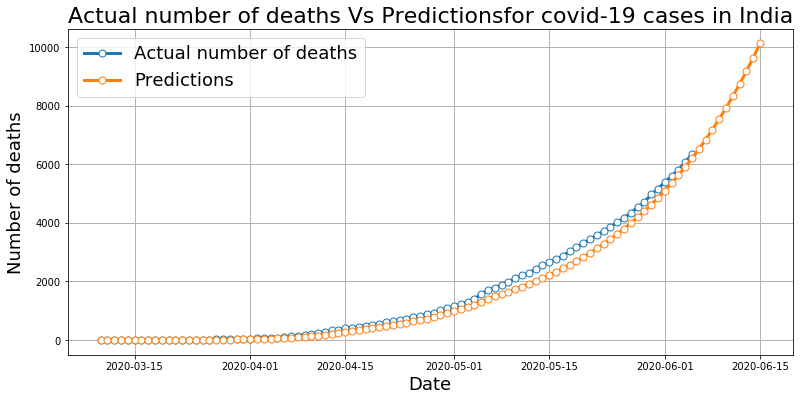

In [1772]:
plt.figure(figsize=(13,6))

marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=7, markerfacecolor='#ffffff')


plt.plot(predictions.index,predictions['deaths'],
         label="Actual number of deaths",**marker_style)

plt.plot(predictions.index,predictions['deaths_pred'],
         label="Predictions",**marker_style)

plt.title("Actual number of deaths Vs Predictionsfor covid-19 cases in India",{'fontsize':22})


plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of deaths",fontsize =18)


plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

plt.legend(fontsize =18)

plt.savefig('Deaths_predictions.png')

In [798]:
#mean_absolute_error(total_df['total'],pred_data[0:86])

In [799]:
#np.sqrt(mean_squared_error(total_df['total'],pred_data[0:86]))

In [800]:
#explained_variance_score(total_df['total'],pred_data[0:86])